In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.simplefilter("ignore", FutureWarning)

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/new_dataset.csv')
df.head()

,name,isFork,commits,branches,defaultBranch,releases,contributors,license,watchers,stargazers,...,homepage,mainLanguage,totalIssues,openIssues,totalPullRequests,openPullRequests,lastCommit,lastCommitSHA,hasWiki,isArchived
0,apache/bigtop,False,2907.0,55,master,0,136.0,Apache License 2.0,57,457,...,NaN,Python,0.0,0.0,1034.0,189.0,2022-10-31T11:37:27,17cebb2eec1df455dc3035b19e15765e127a76e0,True,False
1,ferhatelmas/algo,False,2018.0,1,master,0,1.0,Do What The F*ck You Want To Public License,7,31,...,NaN,Python,0.0,0.0,2.0,0.0,2022-10-13T07:01:48,fb7f177ff85e17b8186e7ef6f670a1ca0dc4f9bb,False,False
2,familysearch/gedcom,False,315.0,9,main,11,9.0,Apache License 2.0,21,67,...,NaN,Python,99.0,40.0,90.0,5.0,2022-10-05T08:43:53,dd1f529d949f264440edf0ee963521f8c77c9d9b,True,False
3,michaelmilleryoder/fanfiction-nlp,False,357.0,3,main,0,8.0,GNU General Public License v3.0,11,22,...,NaN,Python,1.0,1.0,6.0,0.0,2022-08-23T05:07:52,c3b5df200f425b089c373eae60fd46be4ca9db77,True,False
4,googlecloudplatform/community,False,1438.0,9,master,0,349.0,Other,200,1737,...,https://cloud.google.com/community,Python,708.0,32.0,1511.0,35.0,2022-10-15T06:55:35,bedae8a0835ec022ba5f55536447cdb6c4d5ef9a,False,False


In [ ]:
df.shape

(93103, 25)

In [ ]:
df.sort_values(by='lastCommit')['lastCommit']

5087     2020-01-01T01:33:59
5015     2020-01-01T01:38:24
5065     2020-01-01T03:06:05
5086     2020-01-01T04:24:45
4990     2020-01-01T05:00:33
                ...         
48615    2022-10-31T12:37:03
93048    2022-10-31T12:39:40
56024    2022-10-31T12:55:32
63730    2022-10-31T12:57:44
3876     2034-05-15T05:40:15
Name: lastCommit, Length: 93103, dtype: object

In [ ]:
df.columns

Index(['name', 'isFork', 'commits', 'branches', 'defaultBranch', 'releases',
       'contributors', 'license', 'watchers', 'stargazers', 'forks', 'size',
       'createdAt', 'pushedAt', 'updatedAt', 'homepage', 'mainLanguage',
       'totalIssues', 'openIssues', 'totalPullRequests', 'openPullRequests',
       'lastCommit', 'lastCommitSHA', 'hasWiki', 'isArchived'],
      dtype='object')

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
commits,93060.0,427.536063,2353.539622,1.0,28.0,84.0,269.0,225572.0
branches,93103.0,5.676144,45.507993,1.0,1.0,2.0,4.0,11573.0
releases,93103.0,6.004629,24.996813,0.0,0.0,0.0,4.0,2340.0
contributors,86168.0,9.660500,27.210030,0.0,2.0,3.0,7.0,766.0
watchers,93103.0,13.791178,65.200324,0.0,2.0,5.0,11.0,6392.0
stargazers,93103.0,243.919863,1800.647186,10.0,16.0,34.0,102.0,210736.0
forks,93103.0,55.751308,411.866549,0.0,4.0,10.0,29.0,46037.0
size,93103.0,32016.730224,467966.886065,0.0,165.0,1123.0,9730.0,104880243.0
totalIssues,90993.0,55.220402,394.192533,0.0,2.0,7.0,28.0,71873.0
openIssues,90993.0,11.469289,54.360433,0.0,0.0,2.0,7.0,3895.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93103 entries, 0 to 93102
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               93103 non-null  object 
 1   isFork             93103 non-null  bool   
 2   commits            93060 non-null  float64
 3   branches           93103 non-null  int64  
 4   defaultBranch      93103 non-null  object 
 5   releases           93103 non-null  int64  
 6   contributors       86168 non-null  float64
 7   license            93103 non-null  object 
 8   watchers           93103 non-null  int64  
 9   stargazers         93103 non-null  int64  
 10  forks              93103 non-null  int64  
 11  size               93103 non-null  int64  
 12  createdAt          93103 non-null  object 
 13  pushedAt           93103 non-null  object 
 14  updatedAt          93103 non-null  object 
 15  homepage           24498 non-null  object 
 16  mainLanguage       931

In [ ]:
df.describe().columns

Index(['commits', 'branches', 'releases', 'contributors', 'watchers',
       'stargazers', 'forks', 'size', 'totalIssues', 'openIssues',
       'totalPullRequests', 'openPullRequests'],
      dtype='object')

In [ ]:
df.isnull().sum()

name                     0
isFork                   0
commits                 43
branches                 0
defaultBranch            0
releases                 0
contributors          6935
license                  0
watchers                 0
stargazers               0
forks                    0
size                     0
createdAt                0
pushedAt                 0
updatedAt                0
homepage             68605
mainLanguage             0
totalIssues           2110
openIssues            2110
totalPullRequests     1886
openPullRequests      1886
lastCommit               0
lastCommitSHA            0
hasWiki                  0
isArchived               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
lic = ["Apache License 2.0", "BSD 2-Clause Simplified License", "BSD 3-Clause New or Revised License", "Creative Commons Zero v1.0 Universal", "Boost Software License 1.0", "GNU Affero General Public License v3.0", "Eclipse Public License 2.0", "GNU General Public License v3.0", "GNU Lesser General Public License v2.1", "MIT License", "Mozilla Public License 2.0", "The Unlicense"]
lic

['Apache License 2.0',
 'BSD 2-Clause Simplified License',
 'BSD 3-Clause New or Revised License',
 'Creative Commons Zero v1.0 Universal',
 'Boost Software License 1.0',
 'GNU Affero General Public License v3.0',
 'Eclipse Public License 2.0',
 'GNU General Public License v3.0',
 'GNU Lesser General Public License v2.1',
 'MIT License',
 'Mozilla Public License 2.0',
 'The Unlicense']

In [ ]:
df.license.unique()

array(['Apache License 2.0',
       'Do What The F*ck You Want To Public License',
       'GNU General Public License v3.0', 'Other', 'MIT License',
       'BSD 2-Clause Simplified License', 'The Unlicense',
       'GNU General Public License v2.0',
       'GNU Lesser General Public License v2.1',
       'BSD 3-Clause New or Revised License',
       'GNU Lesser General Public License v3.0',
       'GNU Affero General Public License v3.0',
       'Eclipse Public License 2.0', 'ISC License',
       'Creative Commons Zero v1.0 Universal',
       'Mozilla Public License 2.0',
       'Creative Commons Attribution Share Alike 4.0 International',
       'Eclipse Public License 1.0', 'MIT No Attribution', 'zlib License',
       'Creative Commons Attribution 4.0 International',
       'BSD 4-Clause Original or Old License',
       'European Union Public License 1.1', 'SIL Open Font License 1.1',
       'Academic Free License v3.0', 'BSD Zero Clause License',
       'Educational Community Licens

In [ ]:
df = df[df.license.isin(lic)]

In [ ]:
df.shape

(78934, 25)

In [ ]:
# list(df.columns)
cols = ['commits', 'branches', 'releases','contributors','watchers','stargazers','forks','size','createdAt','pushedAt','updatedAt','totalIssues','openIssues','totalPullRequests','openPullRequests','lastCommit','lastCommitSHA','license']
cols

['commits',
 'branches',
 'releases',
 'contributors',
 'watchers',
 'stargazers',
 'forks',
 'size',
 'createdAt',
 'pushedAt',
 'updatedAt',
 'totalIssues',
 'openIssues',
 'totalPullRequests',
 'openPullRequests',
 'lastCommit',
 'lastCommitSHA',
 'license']

In [ ]:
df['hasWiki'].unique()

array([ True, False])

In [ ]:
df[df['hasWiki']==False]['hasWiki'].count()


11445

In [ ]:
df[df['hasWiki']==True]['hasWiki'].count()

67489

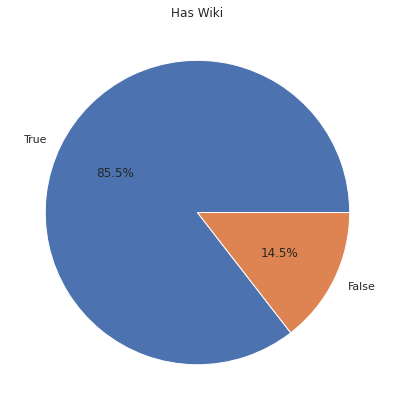

In [ ]:
labels = ['True', 'False']
sizes = [67489, 11445]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title('Has Wiki')
plt.show()

In [ ]:
cols = ['commits','contributors','forks','size','totalIssues','totalPullRequests']
oth = ['createdAt','license']

In [ ]:
cols

['commits',
 'contributors',
 'forks',
 'size',
 'totalIssues',
 'totalPullRequests']

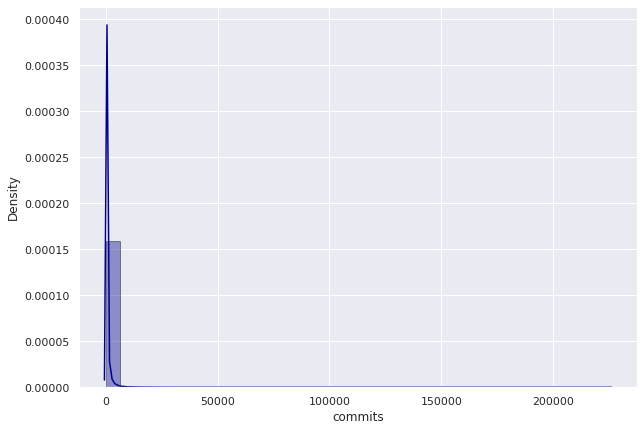

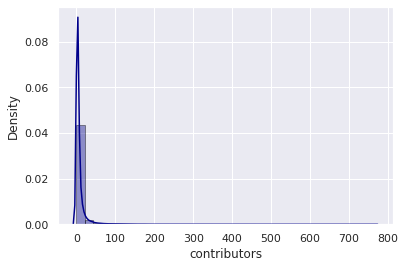

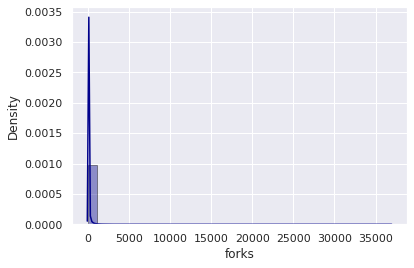

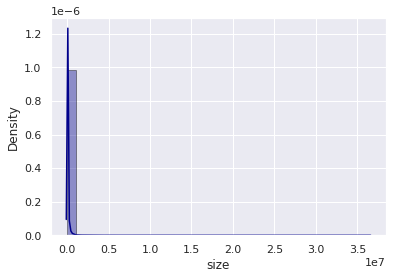

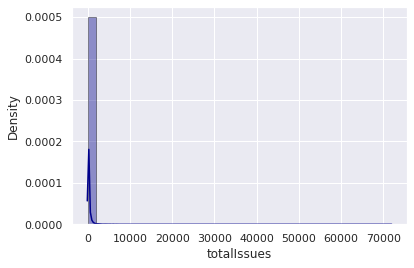

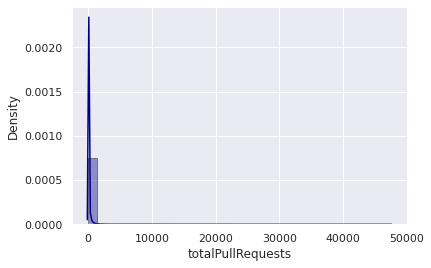

In [ ]:
for i in cols:
  # Density Plot and Histogram of all arrival delays
  sns.distplot(df[i], hist=True, kde=True, 
              bins=int(180/5), color = 'darkblue', 
              hist_kws={'edgecolor':'black'})
  sns.set(rc={'figure.figsize':(6,4)})
  plt.xlabel(i)
  plt.show()

In [ ]:
df['license'] = df['license'].str.replace(" ","")
df['license'] = df['license'].str.replace("\n","")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

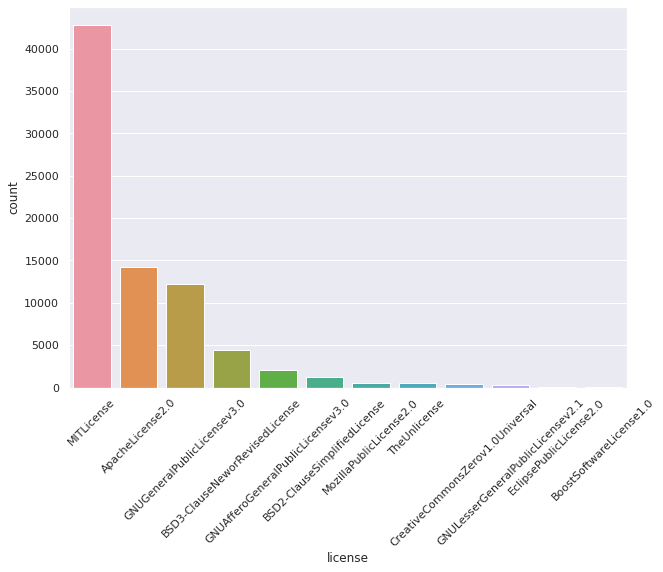

In [ ]:
sns.countplot(df.license,order = df['license'].value_counts().index)
sns.set(rc={'figure.figsize':(10,7)})
plt.xticks(rotation=45)


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
commits,78897.0,361.654499,1971.727475,1.0,27.0,78.0,240.0,225572.0
branches,78934.0,5.448387,47.357541,1.0,1.0,2.0,4.0,11573.0
releases,78934.0,5.818190,24.720711,0.0,0.0,0.0,4.0,2340.0
contributors,72696.0,8.798407,25.604788,0.0,2.0,3.0,7.0,766.0
watchers,78934.0,12.590417,56.467860,0.0,2.0,5.0,10.0,6052.0
stargazers,78934.0,226.813515,1597.300892,10.0,16.0,33.0,97.0,210736.0
forks,78934.0,51.883688,362.125049,0.0,4.0,10.0,27.0,36852.0
size,78934.0,28463.292675,313572.103944,0.0,151.0,995.0,8852.0,36508253.0
totalIssues,77072.0,49.862388,397.277425,0.0,2.0,7.0,25.0,71873.0
openIssues,77072.0,10.323438,49.103880,0.0,0.0,2.0,6.0,3864.0
